In [231]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter


import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [232]:
df_athletes = pd.read_csv("Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv",delimiter=',')

In [233]:
df_athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


### Introduction

An initial view of the data above shows we have 301 entries and 8 data items, one of which in a numeric ID.  The data is split into 3 numeric and 4 object (text based) features.  Of these, 'Sport' and 'Nationality' are categorical variables, as is 'Name', as there are separate entries for individial athletes (presumably one for each year they appeared in the list). 'Previous Year Rank' is storing a mix of numbers and characters and may contain nulls.  Of the numeric data (ignoring 'S.NO', 'Current Rank' could also be regarded as categorical as could 'Year'. 'earning ($ million)' is float type and is the key data item of interest that will mostly be unique.)

In [234]:
df_athletes.isnull().sum()
print (df_athletes.Name.unique)

<bound method Series.unique of 0             Mike Tyson
1         Buster Douglas
2      Sugar Ray Leonard
3           Ayrton Senna
4            Alain Prost
             ...        
296        Stephen Curry
297         Kevin Durant
298          Tiger Woods
299         Kirk Cousins
300         Carson Wentz
Name: Name, Length: 301, dtype: object>


### Data Cleaaning

A quick look at nulls in the data shows there are considerable null values in the 'Previous Year Rank' feature.  This is normal as this feature may well be blank if an anthlete hasn't appeared before and so therefore no imputation is needed here. For the remaining data I am going to look for unique values in the categorical fields to see if they are consistent.

In [235]:
features = ('Name','Nationality','Sport','Year')
for i in features:
    print(i)           
    names = df_athletes[i].unique()
# sort them alphabetically and then take a closer look
    names.sort()
    print(names)

Name
['Aaron Rodgers' 'Aaron Rogers' 'Alain Prost' 'Alex Rodriguez'
 'Andre Agassi' 'Andrew Luck' 'Arnold Palmer' 'Ayrton Senna'
 'Buster Douglas' 'Cam Newton' 'Canelo Alvarez' 'Carson Wentz'
 'Cecil Fielder' 'Conor McGregor' 'Cristiano Ronaldo' 'Dale Earnhardt'
 'Dale Earnhardt Jr.' 'David Beckham' 'Deion Sanders' 'Dennis Rodman'
 'Donovan "Razor" Ruddock' 'Drew Brees' 'Eli Manning' 'Emmit Smith'
 'Evander Holyfield' 'Floyd Mayweather' 'Gary Sheffield' 'George Foreman'
 'Gerhard Berger' 'Grant Hill' 'Greg Norman' 'Jack Nicklaus'
 'Jacques Villeneuve' 'James Harden' 'Jeff Gordon' 'Jim Courier'
 'Joe Montana' 'Joe Sakic' 'Jordan Spieth' 'Kevin Durant' 'Kevin Garnett'
 'Kimi Raikkonen' 'Kirk Cousins' 'Kobe Bryant' 'Lance Armstrong'
 'LeBron James' 'Lennox Lewis' 'Lewis Hamilton' 'Lionel Messi'
 'Manny Pacquiao' 'Matt Ryan' 'Matthew Stafford' 'Michael Jordan'
 'Michael Moorer' 'Michael Schumacher' 'Michael Vick' 'Mike Tyson'
 'Monica Seles' 'Muhammad Ali' 'Neymar' 'Nigel Mansell' 'Novak D

From the above and looking at the full output in the text editor, I can see a few issues. In the 'Names' feature, it looks like 'Aaron Rodgers' and 'Aaron Rogers' may be the same person.  In the 'Year' category 2001 is misssing. In the 'Sport' category there are a number of repeated categories because they haven't been capitalised.  There are some entries listed with a nationality of 'Filipino' that should be 'Philippines'.

I am going to create a new dataframe and first capitalise the 'Sport' feature.  I am also going to change 'Aaron Rogers' to 'Aaron Rodgers' having checked to see if this is an error and change the Natioanlity feature from 'Filipino' to 'Philippines'.  Having cleaned the data, but still with 2001 missing, I am going to proceed with the analysis.  

In [236]:
df_athletes_Clean = df_athletes
df_athletes_Clean
df_athletes_Clean['Name'] = df_athletes_Clean['Name'].replace('Aaron Rogers', 'Aaron Rodgers')
df_athletes_Clean['Nationality'] = df_athletes_Clean['Nationality'].replace('Filipino', 'Philippines')
df_athletes_Clean.Sport=df_athletes_Clean.Sport.str.title()
df_athletes_Clean.Sport

features = ('Name','Nationality','Sport','Year')
for i in features:
    print(i)           
    names = df_athletes_Clean[i].unique()
# sort them alphabetically and then take a closer look
    names.sort()
    print(names)

Name
['Aaron Rodgers' 'Alain Prost' 'Alex Rodriguez' 'Andre Agassi'
 'Andrew Luck' 'Arnold Palmer' 'Ayrton Senna' 'Buster Douglas'
 'Cam Newton' 'Canelo Alvarez' 'Carson Wentz' 'Cecil Fielder'
 'Conor McGregor' 'Cristiano Ronaldo' 'Dale Earnhardt'
 'Dale Earnhardt Jr.' 'David Beckham' 'Deion Sanders' 'Dennis Rodman'
 'Donovan "Razor" Ruddock' 'Drew Brees' 'Eli Manning' 'Emmit Smith'
 'Evander Holyfield' 'Floyd Mayweather' 'Gary Sheffield' 'George Foreman'
 'Gerhard Berger' 'Grant Hill' 'Greg Norman' 'Jack Nicklaus'
 'Jacques Villeneuve' 'James Harden' 'Jeff Gordon' 'Jim Courier'
 'Joe Montana' 'Joe Sakic' 'Jordan Spieth' 'Kevin Durant' 'Kevin Garnett'
 'Kimi Raikkonen' 'Kirk Cousins' 'Kobe Bryant' 'Lance Armstrong'
 'LeBron James' 'Lennox Lewis' 'Lewis Hamilton' 'Lionel Messi'
 'Manny Pacquiao' 'Matt Ryan' 'Matthew Stafford' 'Michael Jordan'
 'Michael Moorer' 'Michael Schumacher' 'Michael Vick' 'Mike Tyson'
 'Monica Seles' 'Muhammad Ali' 'Neymar' 'Nigel Mansell' 'Novak Djokovic'
 'Osca

Let's first see how many sports, countries and different athletes are in the data.  From the print out below we can see we are dealing with 22 nationalities across 20 different sports and a total of 81 athletes.

In [237]:
print(df_athletes_Clean[["Name", "Nationality", "Sport"]].nunique())

#df_athletes_Clean['earnings'] = df_athletes_Clean['earnings ($ million)']
df_athletes_Clean.rename(columns={'earnings ($ million)':'Earnings'}, inplace=True)

df_athletes_Clean.head()

Name           81
Nationality    21
Sport          20
dtype: int64


,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,Earnings
0,1,Mike Tyson,USA,1,NaN,Boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,Boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,Boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,Auto Racing,1990,10.0
4,5,Alain Prost,France,5,NaN,Auto Racing,1990,9.0


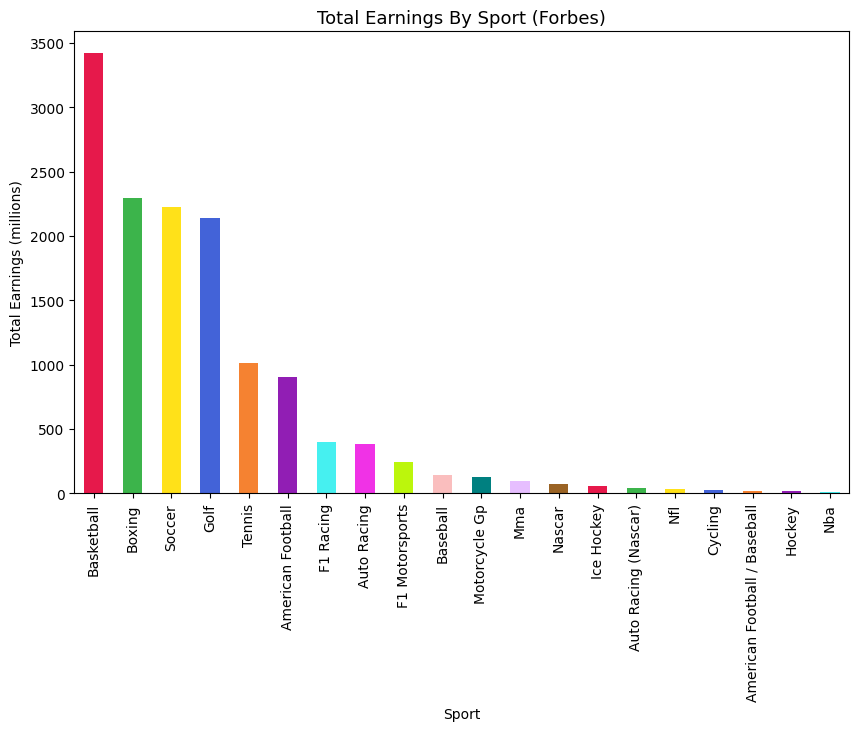

In [278]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324']
plt.figure(figsize=(10,6))
df_athletes_Clean.groupby('Sport') ['Earnings'].sum().sort_values(ascending=False).plot(kind='bar',color=colors)
plt.xlabel("Sport", fontsize=10)
plt.ylabel("Total Earnings (millions)", fontsize=10)
plt.title("Total Earnings By Sport (Forbes)", fontsize=13)
plt.show()

['Mike Tyson', 'Buster Douglas', 'Sugar Ray Leonard', 'Ayrton Senna', 'Alain Prost', 'Jack Nicklaus', 'Greg Norman', 'Michael Jordan', 'Arnold Palmer', 'Evander Holyfield', 'Evander Holyfield', 'Mike Tyson', 'Michael Jordan', 'George Foreman', 'Ayrton Senna', 'Alain Prost', 'Donovan "Razor" Ruddock', 'Arnold Palmer', 'Nigel Mansell', 'Sugar Ray Leonard', 'Michael Jordan', 'Evander Holyfield', 'Ayrton Senna', 'Nigel Mansell', 'Arnold Palmer', 'Andre Agassi', 'Joe Montana', 'Sugar Ray Leonard', 'Jim Courier', 'Monica Seles', 'Michael Jordan', 'Riddick Bowe', 'Ayrton Senna', 'Alain Prost', 'George Foreman', "Shaquille O'Neal", 'Lennox Lewis', 'Cecil Fielder', 'Jim Courier', 'Joe Montana', 'Michael Jordan', "Shaq O'Neal", 'Jack Nicklaus', 'Arnold Palmer', 'Gerhard Berger', 'Wayne Gretzky', 'Michael Moorer', 'Evander Holyfield', 'Andre Agassi', 'Nigel Mansell', 'Michael Jordan', 'Mike Tyson', 'Deion Sanders', 'Riddick Bowe', "Shaquille O'Neal", 'George Foreman', 'Andre Agassi', 'Sugar Ray L

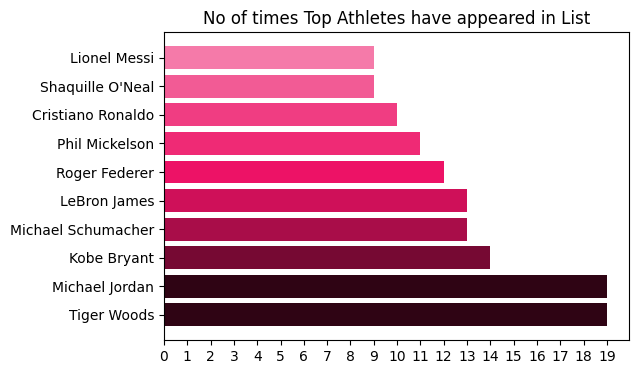

In [266]:

#THis creates a dictionary of names with sport
zip(df_athletes_Clean.Name, df_athletes_Clean.Sport)
nsdict = dict(list(zip(df_athletes_Clean.Name, df_athletes_Clean.Sport)))
#print(nsdict)
tempor1= pd.DataFrame(df_athletes_Clean.groupby('Name')['Year'].count().sort_values(ascending= False).head(10))

names_list = list(df_athletes_Clean['Name'])
print(names_list)
input =  names_list
c = Counter( input )
print( c.items() )

namelist = df_athletes.Name.value_counts()
df = namelist.to_frame()
print(type(df))
df.iloc[0:1]
df.describe()

#print(namelist, type(df_athletes.Name.value_counts()))


#print(yvals)
xticklabels = []
xref = []
print(type(tempor1))
for i,j  in tempor1.iterrows():
    xref.append(i)
    xticklabels.append(nsdict[i])
#print(xticklabels)

# function to add value labels

        
                 #,Bbox = dict(facecolor = 'red', alpha =.8))

tempor1= tempor1.reset_index().rename(columns={'Year':'No of Appearances'})



plt.figure(figsize=(6,4))
#plt.title='Athletes Appearances in the list.'
#print(plt)
plt.xticks(np.arange(0, 20, step=1))
plt.title('No of times Top Athletes have appeared in List')

colors = ['#2f0414','#2f0414','#760933' , '#a90d49','#cf1059','#ed1266','#ef2a75', '#f03d82', '#f25b95','#f57aa9','#f57aa9']
#df.plot.bar(x='Zona',y='Total_MSP',color=colors, ax=ax);


plt.barh(tempor1['Name'],tempor1['No of Appearances'],color=colors)

print(type(tempor1['No of Appearances']))

#for i in range len(tempor1['No of Appearances']):
#    plt.text(i, tempor1['No of Appearances'], xticklabels[i], ha = 'center')
#plt.show()



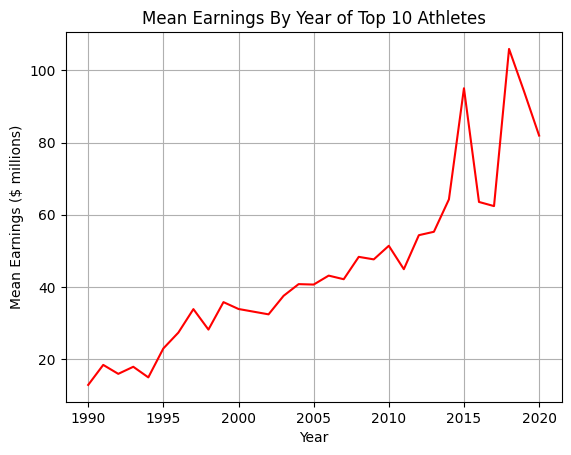

In [323]:

#fig=plt.figure(figsize=(10,6))
#fig.ylabel = 'Total Earnings (millions)'
#sns.lineplot(x='Year',y='Earnings',data=df_athletes_Clean,estimator='mean').set(xlabel ="Year", \
#    ylabel = "Mean Earnings", title ='Trend of Mean Earnings of Forbes Top 10 Athletes 1990-2020')
#plt.show()


df = df_athletes.groupby(['Year']).agg(mean_earning=("Earnings", 'mean'))

df = df.reset_index()

sns.lineplot(x="Year",

y="mean_earning",color='r',


data=df).set(title = 'Mean Earnings By Year of Top 10 Athletes',ylabel='Mean Earnings ($ millions)')


plt.grid()
plt.show()




<bound method Series.unique of 0         USA
1         USA
2         USA
3      Brazil
4      France
        ...  
296       USA
297       USA
298       USA
299       USA
300       USA
Name: NewNation, Length: 301, dtype: object>


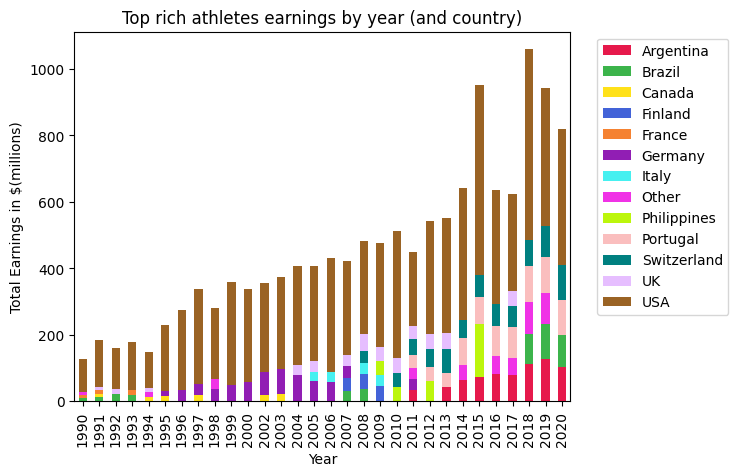

In [276]:
#plt.rcParams["figure.figsize"]=(15,5)

countries = ['Argentina','Brazil','Canada', 'France','Germany','Italy','Finland','Philippines','Portugal','Switzerland','UK','USA']

df_athletes_Clean['NewNation'] = np.where(df_athletes_Clean['Nationality'].isin(countries)== False, 'Other', df_athletes_Clean['Nationality'])
print(df_athletes_Clean['NewNation'].unique)


#'#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000'



#df_athletes_Clean.loc[df_athletes_Clean['Nationality'].isin(countries)==False, 'NewNation'] = 'Other'
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324']
df_athletes_Clean.groupby(['Year', 'NewNation']) ["Earnings"].sum().unstack().plot(kind='bar', stacked=True,legend=False,color=colors)


#df1 = df.to_frame()
#print(df1.loc[2:])
#quit()
#.unstack().plot(kind='bar', stacked=True)



plt.xlabel("Year", fontsize=10)
plt.ylabel("Total Earnings in $(millions)", fontsize=10)
plt.title("Top rich athletes earnings by year (and country)", fontsize=12)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()



#df.plot.bar(x='Zona',y='Total_MSP',color=colors, ax=ax);


#plt.barh(tempor1['Name'],tempor1['No of Appearances'],color=colors)



C:\Users\PaulA\AppData\Local\Temp\ipykernel_24684\154471259.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Top5_sports['RankT3Coeff'] = (4-df_Top5_sports['Current Rank'])/1.8


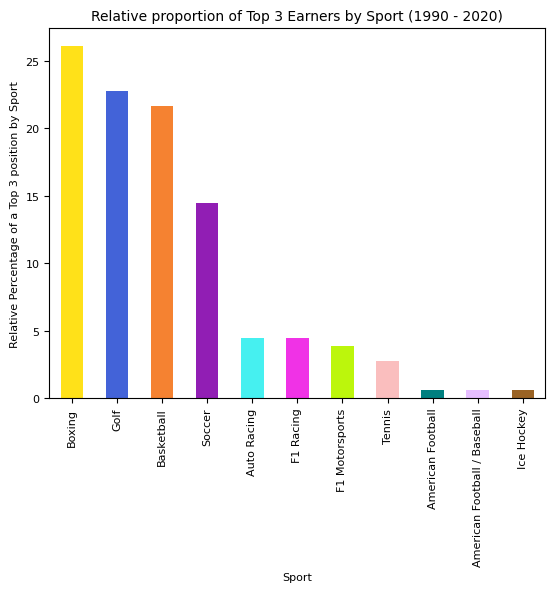

In [306]:
# top 5 sports by year

df_Top5_sports = df_athletes_Clean.loc[df_athletes_Clean['Current Rank'] <= 3]
df_Top5_sports.describe()
df_Top5_sports

df_Top5_sports['RankT3Coeff'] = (4-df_Top5_sports['Current Rank'])/1.8
colors = ['#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324']
df_Top5_sports.groupby(['Sport']) ["RankT3Coeff"].sum().sort_values(ascending=False).plot(kind='bar',color=colors,fontsize=8)
plt.xlabel("Sport", fontsize=8)
plt.ylabel("Relative Percentage of a Top 3 position by Sport", fontsize=8)
plt.title("Relative proportion of Top 3 Earners by Sport (1990 - 2020)", fontsize=10)
plt.show()

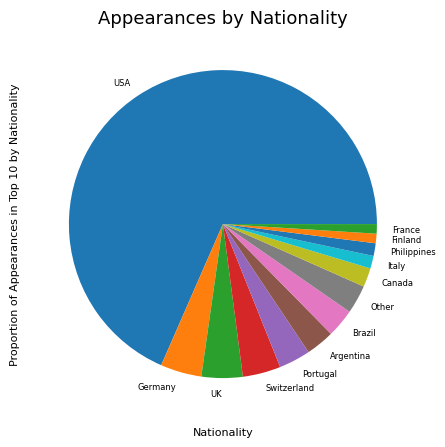

Nationality
USA                 206
Germany              13
UK                   13
Switzerland          12
Portugal             10
Argentina             9
Brazil                9
Canada                6
Philippines           4
Italy                 4
Finland               3
France                3
Dominican             1
Ireland               1
Australia             1
Mexico                1
Northern Ireland      1
Russia                1
Serbia                1
Spain                 1
Austria               1
Name: Nationality, dtype: int64


In [299]:
plt.figure(figsize=(10,5))
df_athletes_Clean.groupby('NewNation') ['NewNation'].count().sort_values(ascending=False).plot(kind='pie',fontsize=6)
plt.xlabel("Nationality", fontsize=8)
plt.ylabel("Proportion of Appearances in Top 10 by Nationality", fontsize=8)
plt.title("Appearances by Nationality", fontsize=13)
plt.show()

print(df_athletes_Clean.groupby('Nationality') ['Nationality'].count().sort_values(ascending=False))


Sport    3
dtype: int64


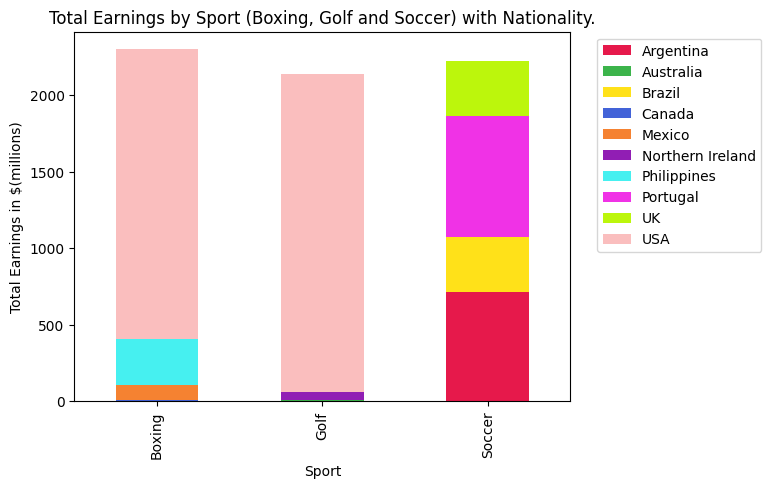

In [319]:


df_box_soccer_golf = df_athletes_Clean.loc[df_athletes_Clean['Sport'].isin(['Boxing','Soccer','Golf'])]

print(df_box_soccer_golf[["Sport"]].nunique())

colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324']

#print(df_box_soccer_golf.groupby(['Sport', 'Nationality']) ["Earnings"].sum().sort_values(ascending=True))

df_box_soccer_golf.groupby(['Sport', 'Nationality']) ["Earnings"].sum().sort_values(ascending=False).unstack().plot(kind='bar', stacked=True,legend=False,color=colors)


#df1 = df.to_frame()
#print(df1.loc[2:])
#quit()
#.unstack().plot(kind='bar', stacked=True)



plt.xlabel("Sport", fontsize=10)
plt.ylabel("Total Earnings in $(millions)", fontsize=10)
plt.title("Total Earnings by Sport (Boxing, Golf and Soccer) with Nationality.", fontsize=12)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()
